In [ ]:
%pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/8101 Customer Analytics/Customer_data_MADT8101_class3_v04.xlsx'

In [ ]:
df = pd.read_excel(path)

In [ ]:
df = df.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUST_CODE                      3439 non-null   object        
 1   FQ                             3439 non-null   int64         
 2   Start_Date                     3439 non-null   datetime64[ns]
 3   Total_Spend                    3439 non-null   float64       
 4   Last_Date                      3439 non-null   datetime64[ns]
 5   MTBP                           3439 non-null   float64       
 6   Life_Time                      3439 non-null   int64         
 7   ARPU                           3439 non-null   float64       
 8   CLTV                           3439 non-null   float64       
 9   MOD_CUST_LIFESTAGE             3439 non-null   object        
 10  CUST_LIFESTAGE                 3439 non-null   object        
 11  MOD_CUST_PRICE_SE

In [ ]:
df.describe()

,FQ,Total_Spend,MTBP,Life_Time,ARPU,CLTV,BASKET_SIZE_L,BASKET_SIZE_M,BASKET_SIZE_S,BASKET_PRICE_SENSITIVITY_LA,...,BASKET_TYPE_XX,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Non_Food,MOD_CUST_LIFESTAGE_CD,MOD_CUST_PRICE_SENSITIVITY_CD,BASKET_SIZE_L%,BASKET_SIZE_M%,BASKET_SIZE_S%
count,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,...,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000
mean,18.947078,276.088377,46.598115,581.023844,12.816334,7705.413741,7.488805,6.686246,4.772027,0.179703,...,0.011341,0.467869,0.205001,0.187264,0.063100,3.232335,1.335272,0.313043,0.330570,0.356387
std,46.331043,710.522251,65.998589,213.704438,15.350457,9501.248343,20.032400,20.300867,13.643569,0.383996,...,0.105902,0.499039,0.403761,0.390180,0.243178,2.118464,1.185577,0.365795,0.344567,0.385886
min,1.000000,0.010000,0.000000,100.000000,0.010000,1.270000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.755000,0.000000,404.000000,2.893333,1305.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,31.420000,19.857143,648.000000,8.325000,4702.053243,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.142857,0.269231,0.214286
75%,13.000000,163.255000,66.000000,773.000000,17.513333,10744.915227,4.000000,4.000000,3.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.581818,0.500000,0.666667
max,624.000000,8281.660000,402.500000,827.000000,306.970000,183261.090000,241.000000,439.000000,212.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,1.000000,1.000000,1.000000


In [ ]:
df[df['ARPU'] == df['ARPU'].max()]

,CUST_CODE,FQ,Start_Date,Total_Spend,Last_Date,MTBP,Life_Time,ARPU,CLTV,MOD_CUST_LIFESTAGE,...,BASKET_TYPE_XX,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Non_Food,MOD_CUST_LIFESTAGE_CD,MOD_CUST_PRICE_SENSITIVITY_CD,BASKET_SIZE_L%,BASKET_SIZE_M%,BASKET_SIZE_S%
2182,CUST0000340481,2,2006-11-26,613.94,2008-05-10,265.5,597,306.97,183261.09,Other,...,0.0,1.0,0.0,0.0,0.0,5,3,1.0,0.0,0.0


In [ ]:
df = df[df['CUST_CODE'] != 'CUST0000340481']

In [ ]:
# Drop the SKU no. column
df_features = df.drop(['CUST_CODE'], axis=1)
df_features = df_features.drop(['Start_Date'], axis=1)
df_features = df_features.drop(['Last_Date'], axis=1)
#df_features = df_features.drop(['Life_Time'], axis=1)
df_features = df_features.drop(['MOD_CUST_LIFESTAGE'], axis=1)
df_features = df_features.drop(['CUST_LIFESTAGE'], axis=1)
df_features = df_features.drop(['MOD_CUST_PRICE_SENSITIVITY'], axis=1)
df_features = df_features.drop(['CUST_PRICE_SENSITIVITY'], axis=1)
df_features = df_features.drop(['BASKET_SIZE_L'], axis=1)
df_features = df_features.drop(['BASKET_SIZE_M'], axis=1)
df_features = df_features.drop(['BASKET_SIZE_S'], axis=1)

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 3438
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FQ                             3438 non-null   int64  
 1   Total_Spend                    3438 non-null   float64
 2   MTBP                           3438 non-null   float64
 3   Life_Time                      3438 non-null   int64  
 4   ARPU                           3438 non-null   float64
 5   CLTV                           3438 non-null   float64
 6   BASKET_PRICE_SENSITIVITY_LA    3438 non-null   float64
 7   BASKET_PRICE_SENSITIVITY_MM    3438 non-null   float64
 8   BASKET_PRICE_SENSITIVITY_UM    3438 non-null   float64
 9   BASKET_PRICE_SENSITIVITY_XX    3438 non-null   float64
 10  BASKET_TYPE_Small_Shop         3438 non-null   float64
 11  BASKET_TYPE_Top_Up             3438 non-null   float64
 12  BASKET_TYPE_Full_Shop          3438 non-null   f

In [ ]:
df_features[df_features['ARPU'] == df_features['ARPU'].max()]

,FQ,Total_Spend,MTBP,Life_Time,ARPU,CLTV,BASKET_PRICE_SENSITIVITY_LA,BASKET_PRICE_SENSITIVITY_MM,BASKET_PRICE_SENSITIVITY_UM,BASKET_PRICE_SENSITIVITY_XX,...,BASKET_TYPE_XX,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Non_Food,MOD_CUST_LIFESTAGE_CD,MOD_CUST_PRICE_SENSITIVITY_CD,BASKET_SIZE_L%,BASKET_SIZE_M%,BASKET_SIZE_S%
2171,1,181.97,0.0,568,181.97,103358.96,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2,1,1.0,0.0,0.0


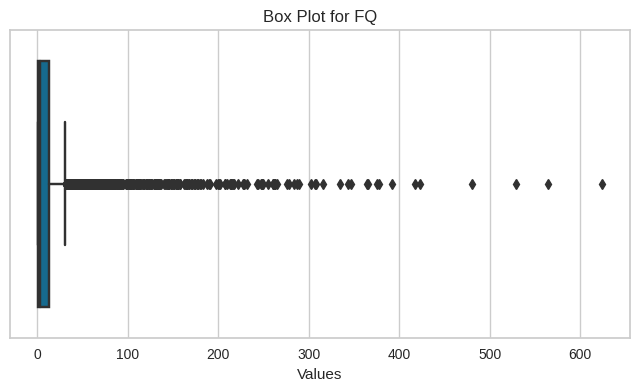

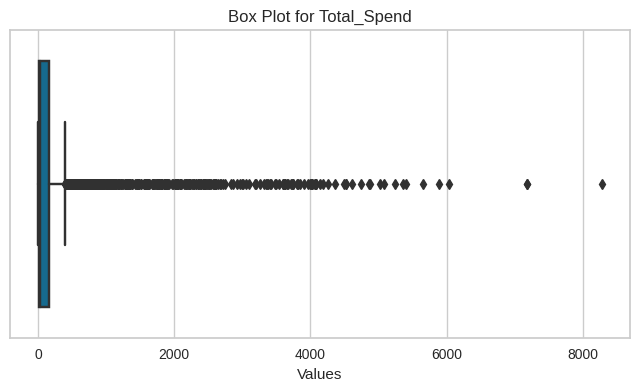

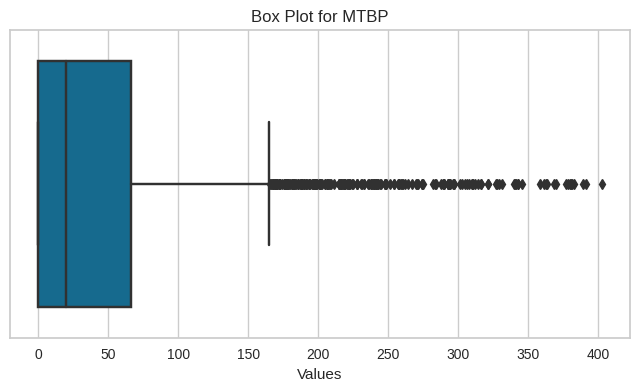

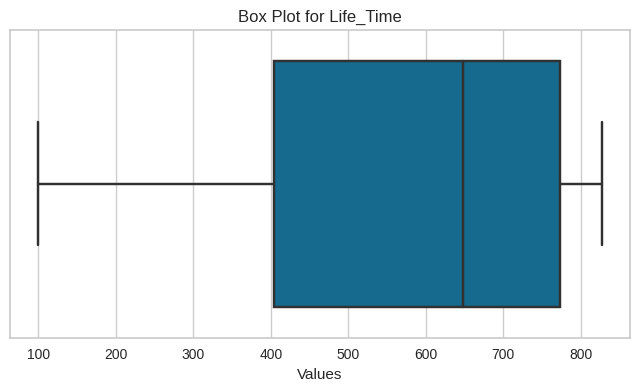

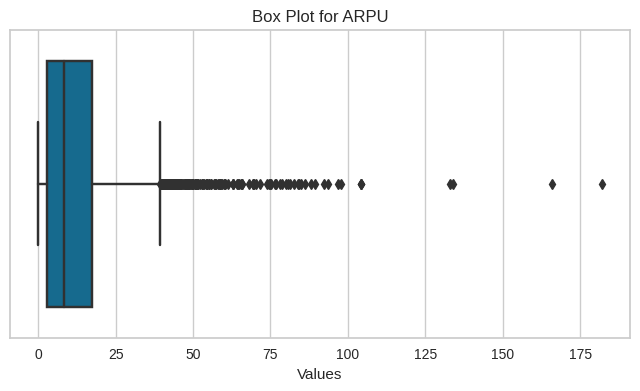

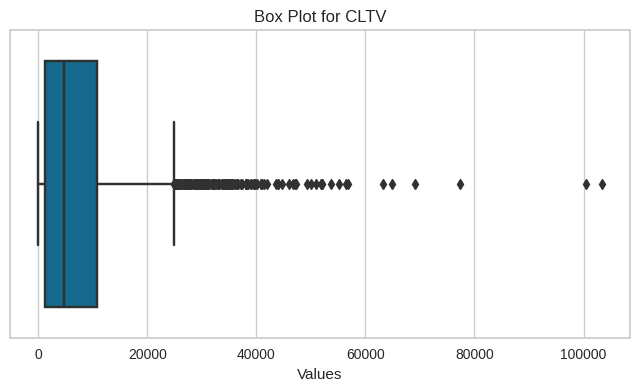

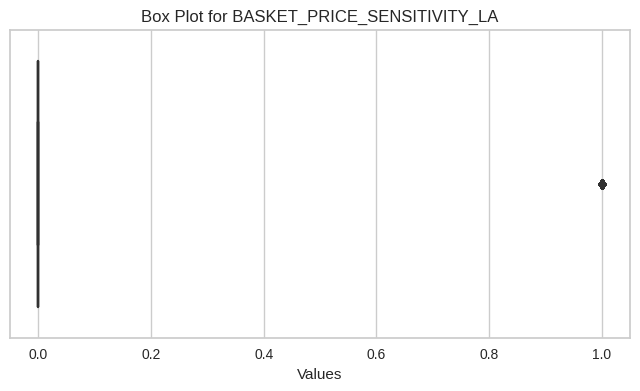

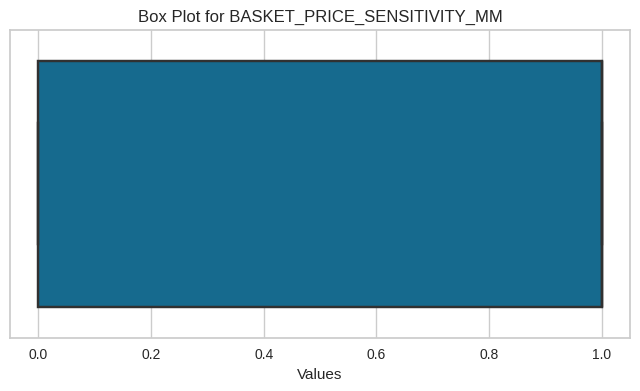

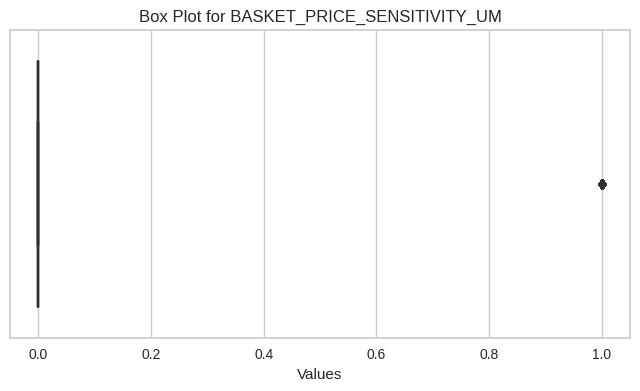

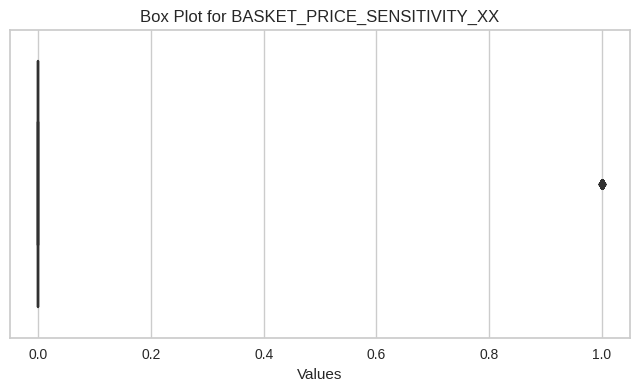

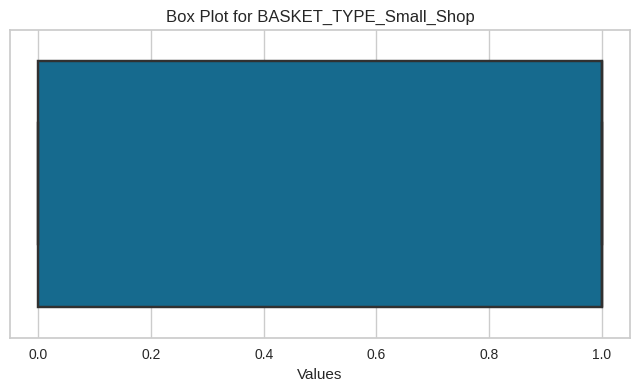

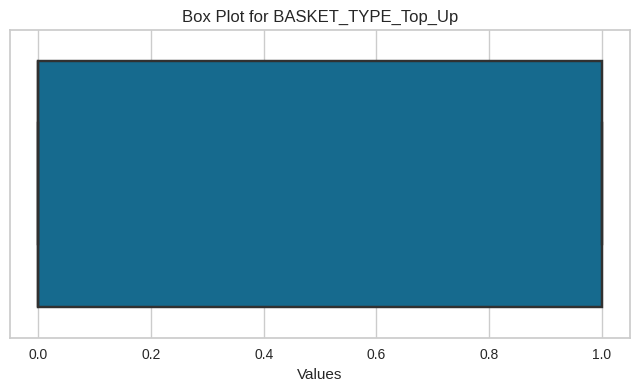

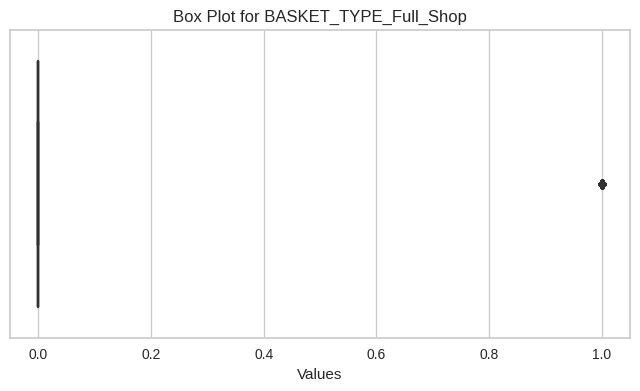

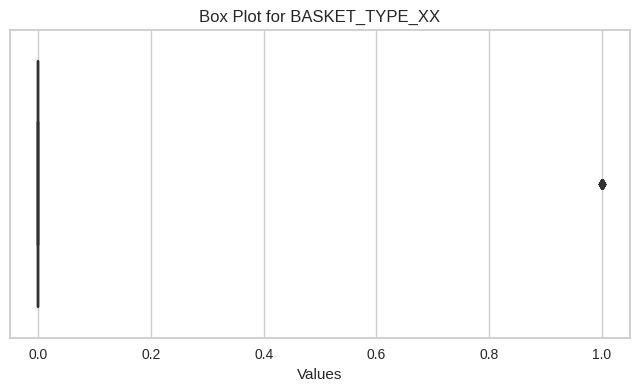

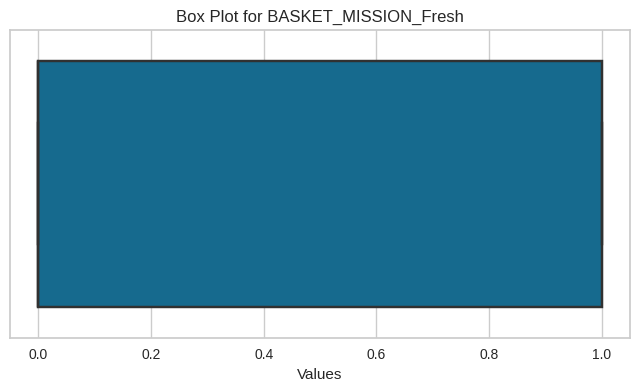

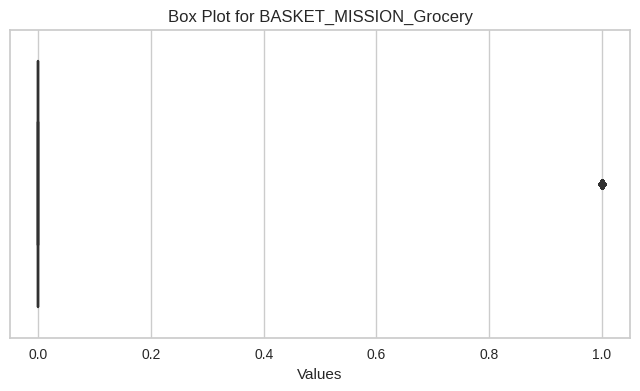

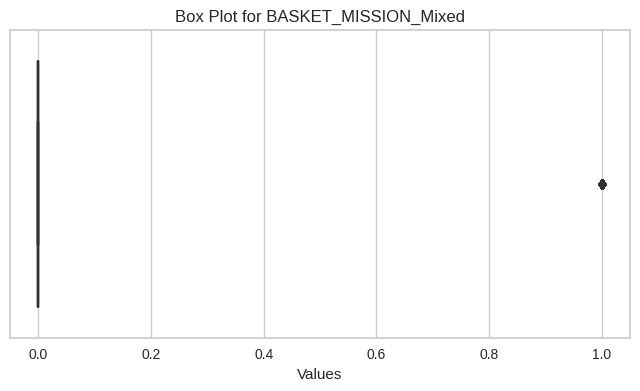

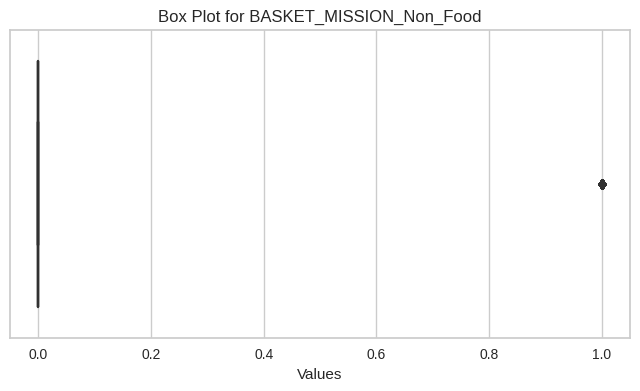

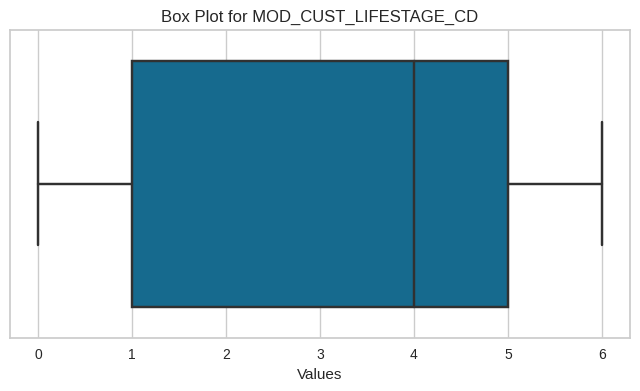

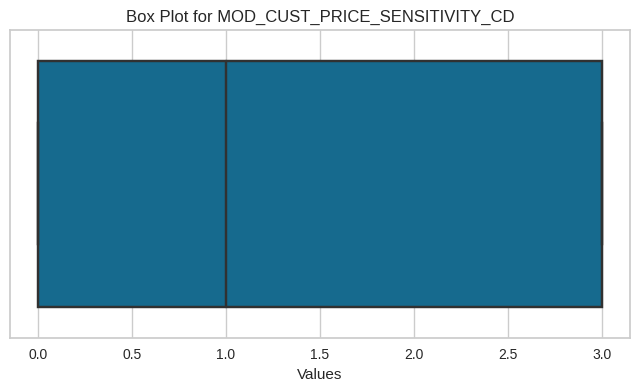

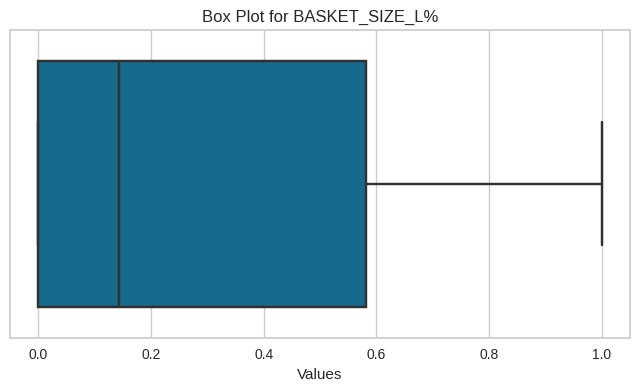

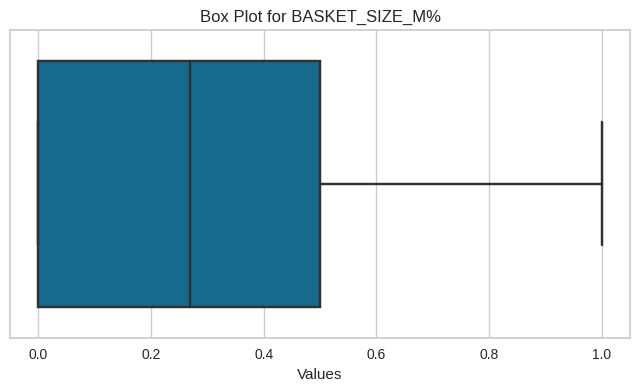

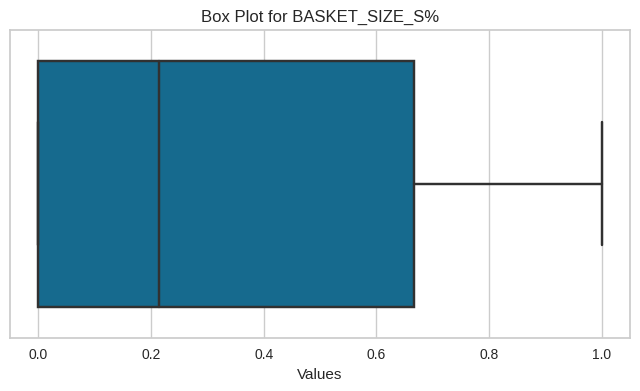

In [ ]:
# Loop through each feature column and create a box plot
for column in df_features.columns:
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    sns.boxplot(x=df_features[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel('Values')
    plt.show()

In [ ]:
# Standardize the features
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

## Find the optimal number of clusters

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

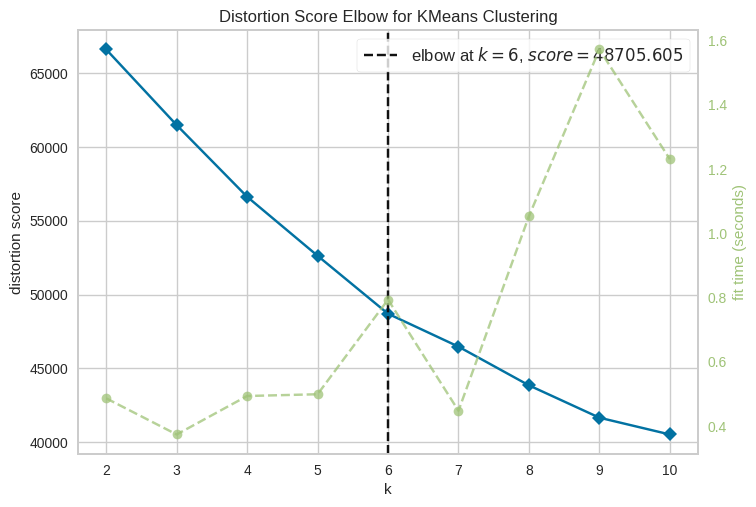

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=158), k=10, scoere='calinski_harabasz')
Elbow_M.fit(df_features_scaled)
Elbow_M.show();

For n_clusters = 2 The average silhouette_score is: 0.1771952202927514
For n_clusters = 3 The average silhouette_score is: 0.114322859600808
For n_clusters = 4 The average silhouette_score is: 0.10920473963633028
For n_clusters = 5 The average silhouette_score is: 0.11767633987340637
For n_clusters = 6 The average silhouette_score is: 0.11450909437704834
For n_clusters = 7 The average silhouette_score is: 0.11971478219132763
For n_clusters = 8 The average silhouette_score is: 0.12083311016542268
For n_clusters = 9 The average silhouette_score is: 0.12911106859359553


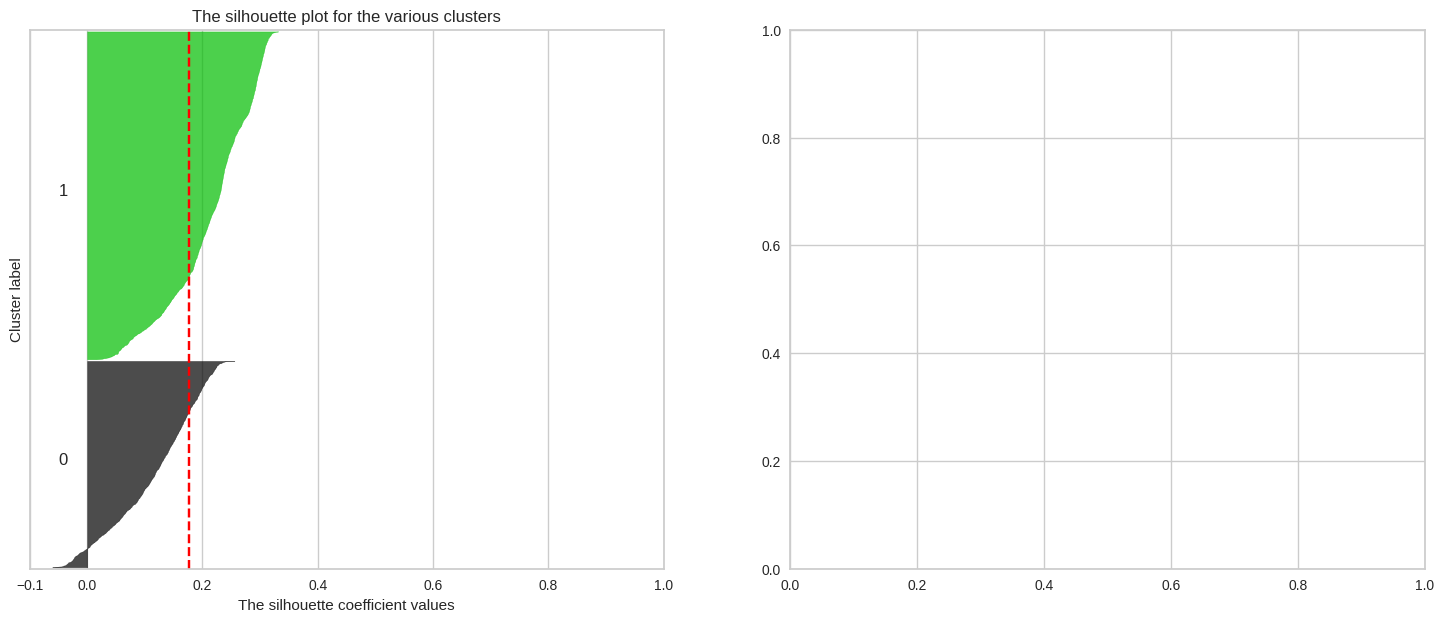

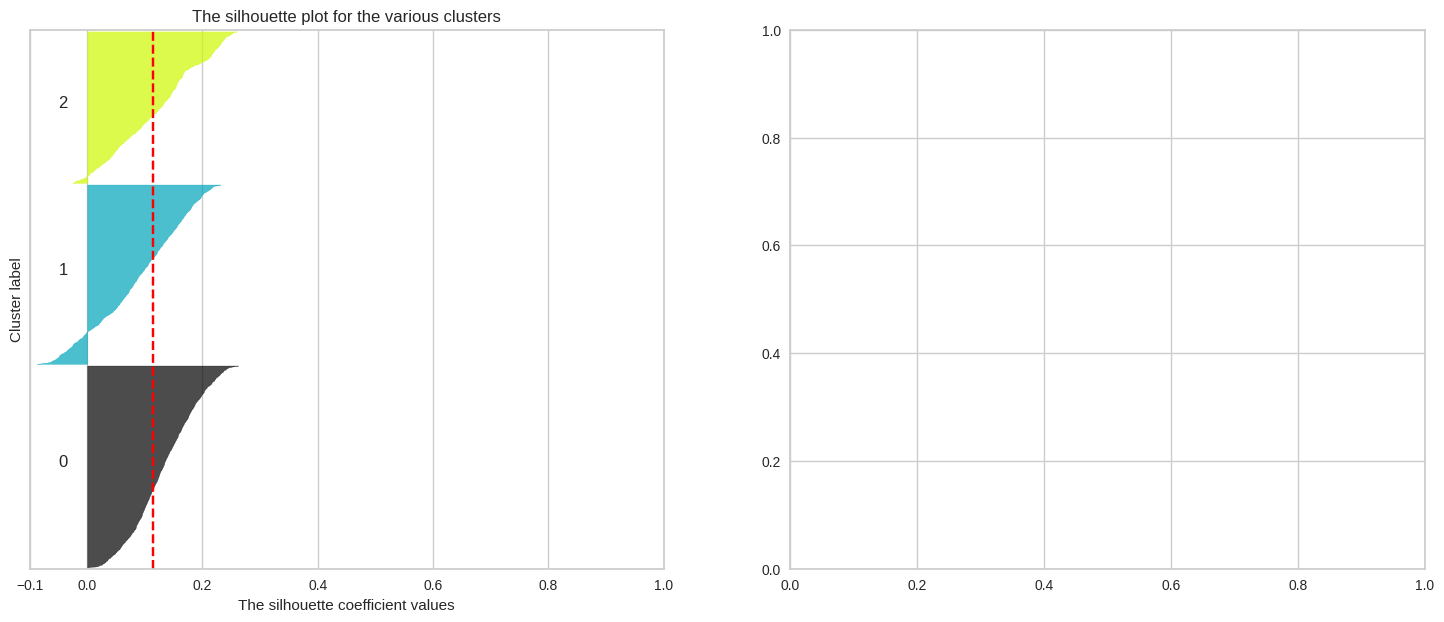

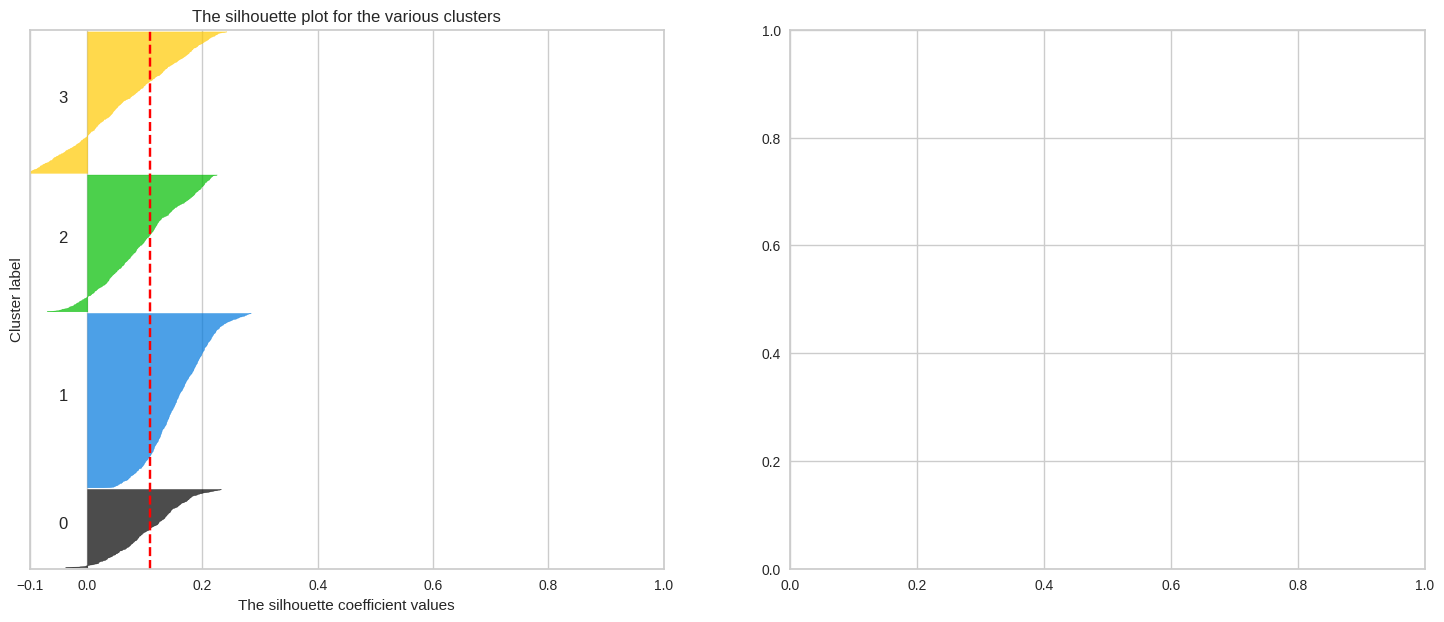

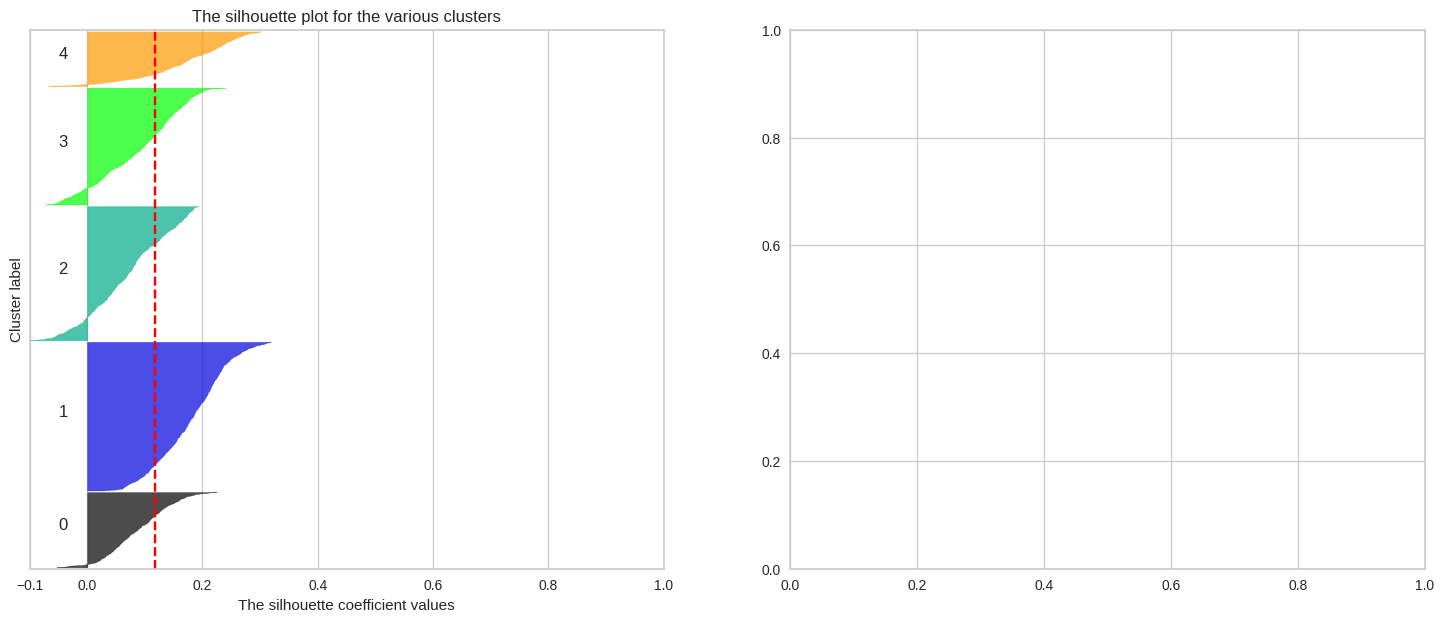

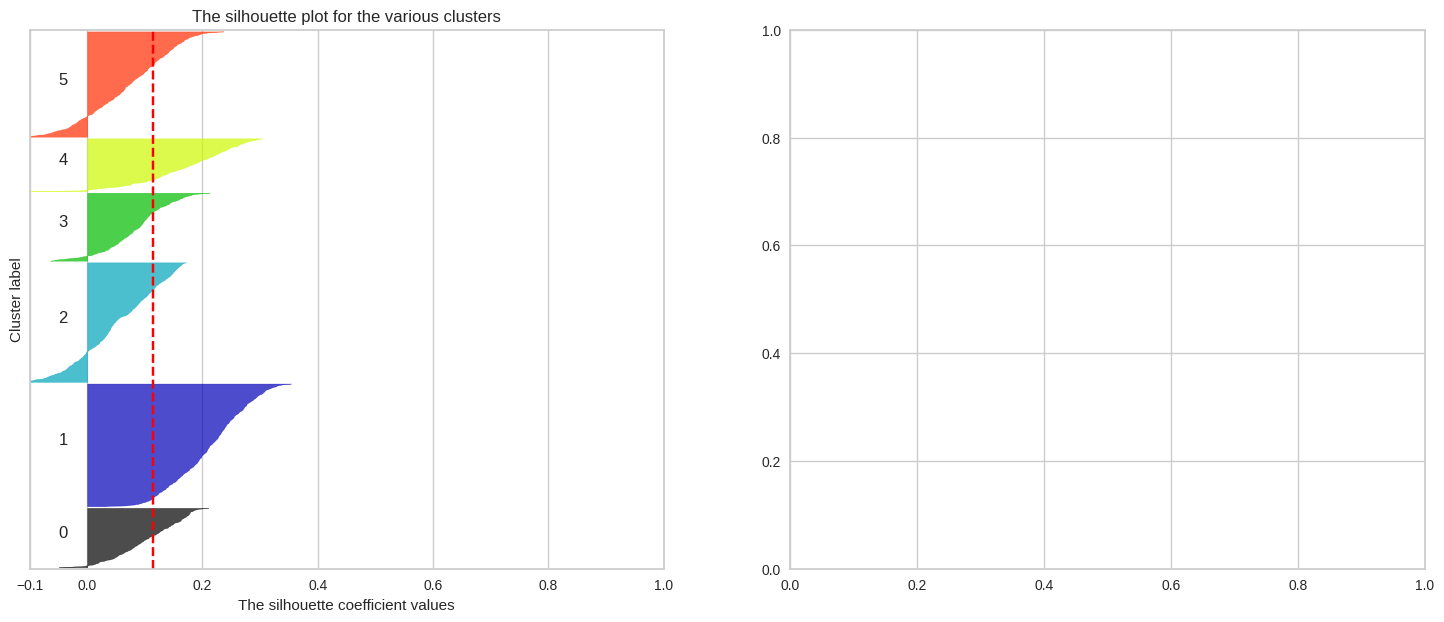

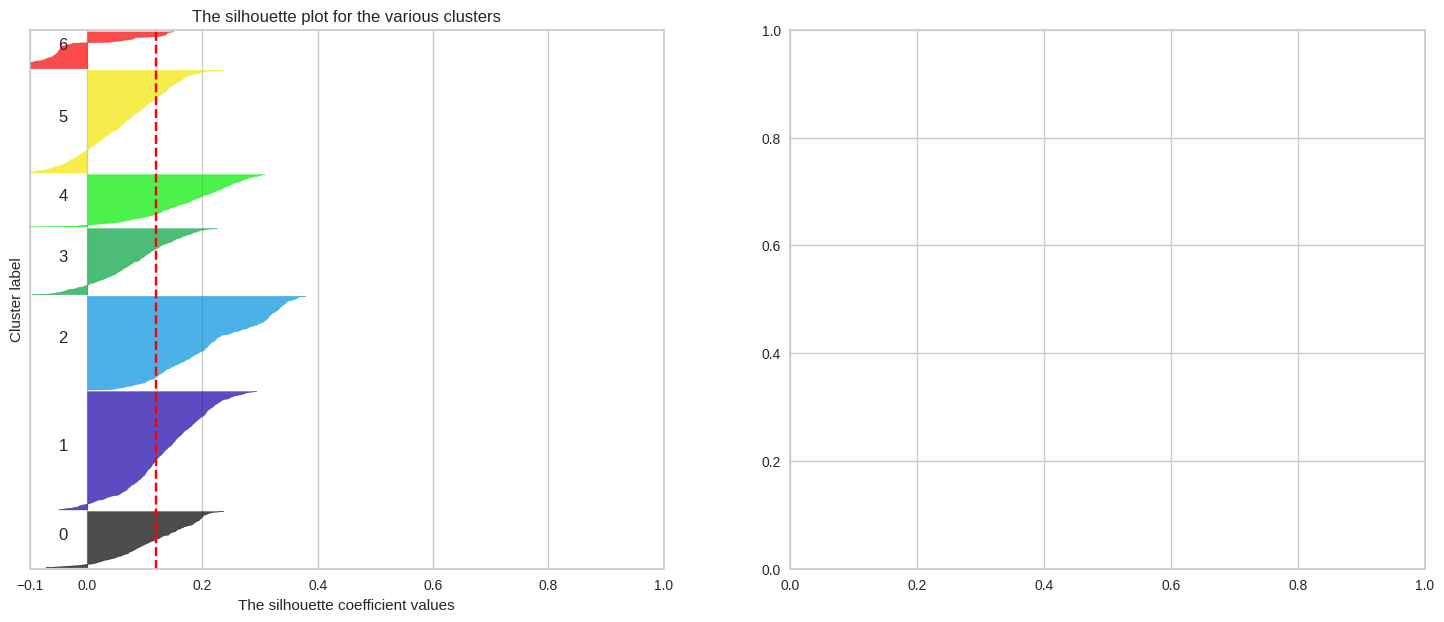

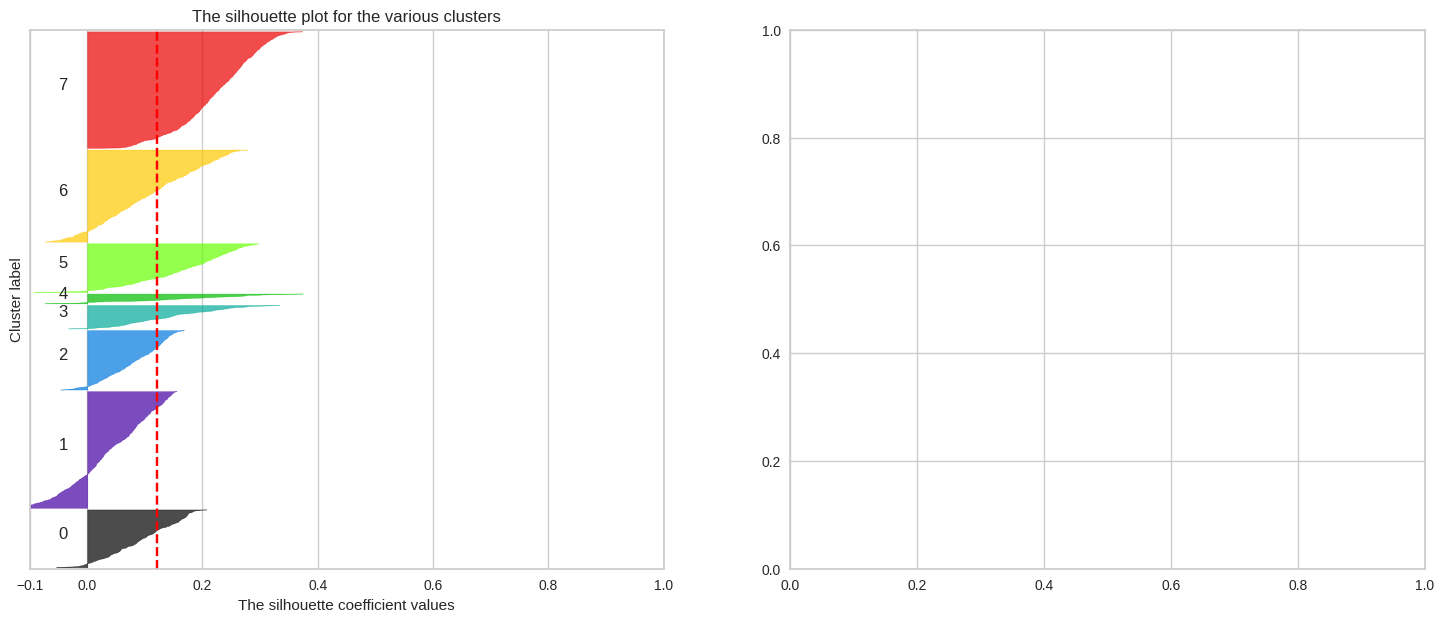

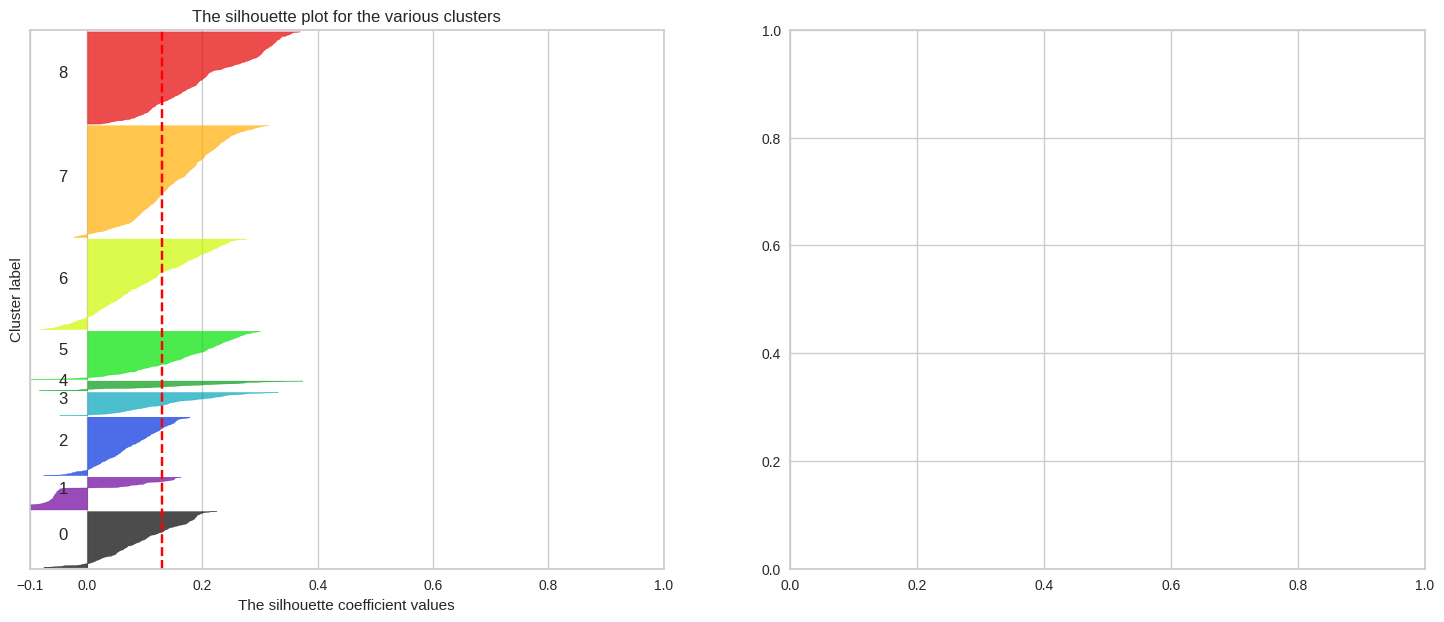

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

# Generating the sample data
X = df_features_scaled
n_samples, n_features = X.shape
centers = 4
cluster_std = 1

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1, but in this example, all
    # values lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the y-axis labels/ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters formed
    colors = cm


## Fit & Predict the model

In [ ]:
# Initiating the K-means Clustering model
KM = KMeans(n_clusters=4, random_state=666)

In [ ]:
# Fit model and predict clusters
yhat_KM = KM.fit_predict(df_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# create a new column in the scaled dataframe with the cluster labels
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)
df_features_scaled["Clusters"] = pd.Series(yhat_KM, index=df_features_scaled.index)

In [ ]:
# Adding the Clusters feature to the original dataframe.
df["Clusters"] = df_features_scaled["Clusters"]

In [ ]:
# calculate Silhouette Coefficient
score = silhouette_score(df_features_scaled, yhat_KM)
print(f"For k=4, the Silhouette Coefficient is {score:.2f}")

For k=4, the Silhouette Coefficient is 0.16


## Principle Component Analysis

In [ ]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(df_features_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_features_scaled), columns=(["PC1","PC2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,3438.0,1.322709e-16,2.175187,-3.282399,-1.821409,-0.610025,1.651003,10.849561
PC2,3438.0,-7.026892e-17,1.496380,-4.800054,-0.709332,-0.035942,0.669059,10.009764


In [ ]:
PCA_ds["Clusters"] = yhat_KM

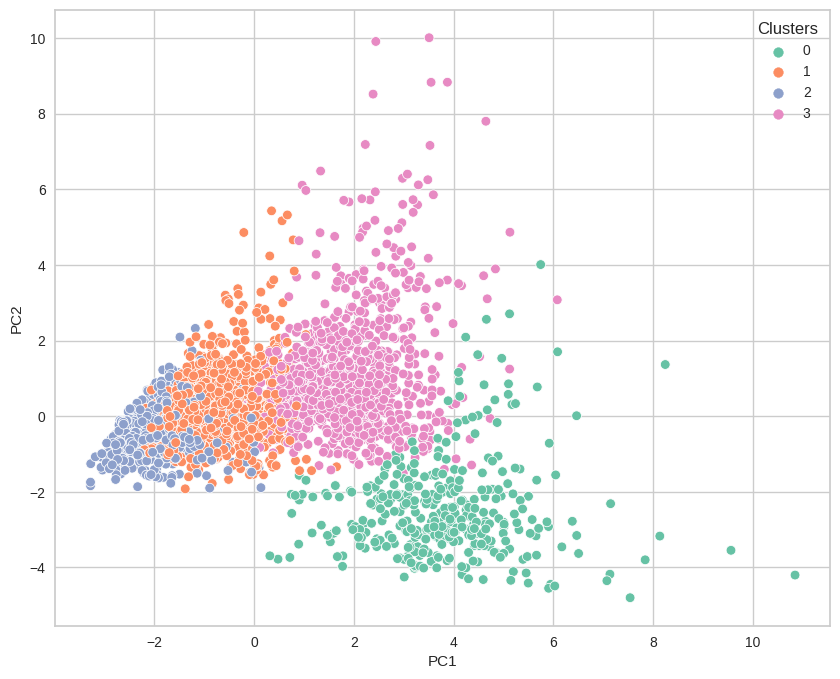

In [ ]:
# Plot the clusters on reduced dimension data
plt.figure(figsize=(10,8))
sns.scatterplot(x="PC1", y="PC2", hue="Clusters", data=PCA_ds, palette="Set2")
plt.show()

## Export Train Result

In [ ]:
cluster_results = df

In [ ]:
cluster_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 3438
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUST_CODE                      3438 non-null   object        
 1   FQ                             3438 non-null   int64         
 2   Start_Date                     3438 non-null   datetime64[ns]
 3   Total_Spend                    3438 non-null   float64       
 4   Last_Date                      3438 non-null   datetime64[ns]
 5   MTBP                           3438 non-null   float64       
 6   Life_Time                      3438 non-null   int64         
 7   ARPU                           3438 non-null   float64       
 8   CLTV                           3438 non-null   float64       
 9   MOD_CUST_LIFESTAGE             3438 non-null   object        
 10  CUST_LIFESTAGE                 3438 non-null   object        
 11  MOD_CUST_PRICE_SE

In [ ]:
sku_count = cluster_results.groupby('Clusters')['CUST_CODE'].nunique()
print(sku_count)

Clusters
0.0     353
1.0    1202
2.0     970
3.0     912
Name: CUST_CODE, dtype: int64


In [ ]:
cluster_results.to_excel('/content/drive/MyDrive/8101 Customer Analytics/Customer_ClusterResultV2.xlsx', index=False)

In [ ]:
# List of datetime column names to exclude
datetime_columns = ['Start_Date', 'Last_Date']  # Add the names of your datetime columns here

# Exclude datetime columns from the DataFrame
non_datetime_columns = [col for col in df.columns if col not in datetime_columns]

# Group by cluster and calculate the average of non-datetime columns
cluster_averages = cluster_results.groupby('Clusters')[non_datetime_columns].mean()

# Display the average values per cluster
cluster_averages

<ipython-input-106-10c7d4d13eba>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_averages = cluster_results.groupby('Clusters')[non_datetime_columns].mean()


,FQ,Total_Spend,MTBP,Life_Time,ARPU,CLTV,BASKET_SIZE_L,BASKET_SIZE_M,BASKET_SIZE_S,BASKET_PRICE_SENSITIVITY_LA,...,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Non_Food,MOD_CUST_LIFESTAGE_CD,MOD_CUST_PRICE_SENSITIVITY_CD,BASKET_SIZE_L%,BASKET_SIZE_M%,BASKET_SIZE_S%,Clusters
Clusters,,,,,,,,,,,,,,,,,,,,,
0.0,20.084986,471.295637,55.622183,593.218130,36.850838,20875.859883,11.441926,5.121813,3.521246,0.286119,...,0.359773,0.093484,0.521246,0.002833,3.475921,0.951841,0.818389,0.107436,0.074174,0.0
1.0,18.310316,185.409983,49.964672,590.945092,8.755505,5340.835048,4.515807,8.247920,5.546589,0.188020,...,0.544093,0.171381,0.132280,0.044925,3.192180,1.411814,0.142982,0.639291,0.217727,1.0
2.0,4.255670,23.167866,46.733497,502.789691,3.137987,1644.453454,0.406186,1.059794,2.789691,0.113402,...,0.363918,0.423711,0.070103,0.159794,3.164948,1.407216,0.035469,0.111805,0.852726,2.0
3.0,35.009868,588.981316,38.335262,646.864035,18.850934,11986.477641,17.424342,11.231360,6.354167,0.198465,...,0.519737,0.060307,0.255482,0.007675,3.258772,1.302632,0.636396,0.242354,0.121249,3.0


In [ ]:
cluster_averages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FQ                             3 non-null      float64
 1   Total_Spend                    3 non-null      float64
 2   MTBP                           3 non-null      float64
 3   Life_Time                      3 non-null      float64
 4   ARPU                           3 non-null      float64
 5   CLTV                           3 non-null      float64
 6   BASKET_SIZE_L                  3 non-null      float64
 7   BASKET_SIZE_M                  3 non-null      float64
 8   BASKET_SIZE_S                  3 non-null      float64
 9   BASKET_PRICE_SENSITIVITY_LA    3 non-null      float64
 10  BASKET_PRICE_SENSITIVITY_MM    3 non-null      float64
 11  BASKET_PRICE_SENSITIVITY_UM    3 non-null      float64
 12  BASKET_PRICE_SENSITIVITY_XX    3 non-null      float64